In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

first, lets decide what kind of universe you want to live by setting some parameters

In [2]:
class params():
    def __init__(self):
        # lcdm
        self.omega_b = 0.022383
        self.omega_c = 0.12011
        self.theta_MC = 1.040909 / 100
        self.tau_reio = 0.0543
        self.ln10_p10_A_s = 3.0448
        self.n_s = 0.96605

        self.omega_m = 0.14314
        self.h = 0.5
        self.Omega_m = 0.3158
        self.age = 13.7971
        self.sigma8 = 0.8120
        self.S8 = 0.8331
        self.z_re = 7.68
        self.theta_ast = 1.041085 / 100
        self.r_drag_Mpc = 147.049
    
params_my_uni = params()

the `# lcdm` means "Lambda Cold Dark Matter".

so, I have just decided to live in a universe with "normal dark energy and cold dark matter".

In [5]:
print('I want to let the current expansion rate of the universe be {:.2f} km/s/Mpc. but is it possible? we will find it out when we finish the program.'.format(params_my_uni.h * 100))

I want to let the current expansion rate of the universe be 50.00 km/s/Mpc. but is it possible? we will find it out when we finish the program.


then, lets create the `.ini` file as we agreed. (we agreed on this, right?)

In [6]:
import os

def write_ini(model_name, ini_file_dir = 'ini/'):
    ini_file_path = ini_file_dir + model_name + '.ini'

    with open(ini_file_path, mode = 'w') as ini_init:
        ini_init.write('output = tCl, lCl\n')
        ini_init.write('write parameters = yes\n')
        ini_init.write('omega_b = {}\n'.format(params_my_uni.omega_b))
        ini_init.write('omega_cdm = {}\n'.format(params_my_uni.omega_c))
        ini_init.write('tau_reio = {}\n'.format(params_my_uni.tau_reio))
        ini_init.write('ln10^{{10}}A_s = {}\n'.format(params_my_uni.ln10_p10_A_s))
        ini_init.write('n_s = {}\n'.format(params_my_uni.n_s))
        ini_init.write('h = {}\n'.format(params_my_uni.h))
        ini_init.write('modes = s\n')
        ini_init.write('gauge = synchronous\n')
        ini_init.write('input_verbose = 1\n')
        ini_init.write('background_verbose = 1\n')
        ini_init.write('thermodynamics_verbose = 1\n')
        ini_init.write('perturbations_verbose = 1\n')
        ini_init.write('transfer_verbose = 1\n')
        ini_init.write('primordial_verbose = 1\n')
        ini_init.write('spectra_verbose = 1\n')
        ini_init.write('nonlinear_verbose = 1\n')
        ini_init.write('lensing_verbose = 1\n')
        ini_init.write('output_verbose = 1\n')
        ini_init.write('l_max_scalars = 3000\n')
        ini_init.write('root = {}/output/{}\n'.format(os.getcwd(), model_name))
        ini_init.write('overwrite_root = yes\n')
        ini_init.write('headers = yes\n')
        ini_init.write('format = class')
    
    return ini_file_path

model_name = 'my_uni'
ini_file_path = write_ini(model_name)
print('the address of the .ini file: {}'.format(ini_file_path))

the address of the .ini file: ini/my_uni.ini


nowthat the `.ini` file is created, we should feed it into CLASS

NOTE: you may want to run `chmod +x class` to give `class` the permission to run.

In [7]:
import subprocess
from subprocess import run

class_path = os.getcwd() + '/./class'
def mod_model(h, model_name, class_path = class_path):
    params_my_uni.h = h
    ini_file_path = write_ini(model_name)
    run('{} {}'.format(class_path, ini_file_path), shell = True, stdout = subprocess.DEVNULL, stderr = subprocess.STDOUT)

    # if you want to see the calculation process, run the follow line instead
    # run('{} {}'.format(class_path, ini_file_path), shell = True)

    return

mod_model(0.5, model_name)

now, if it works well, you should be able to see that in the `output` folder there has been many files generated with the name that you assigned to `model_name`.

for now, we only need the first two columns in `_cl.dat`. and it needs some unit conversion.

In [8]:
def fetch_Dl_class(model_name, output_dir = 'output/'):
    Cl_path = output_dir + model_name + '_cl.dat'
    Cl_data = np.loadtxt(Cl_path)
    l = Cl_data[:, 0]
    Cl_TT = Cl_data[:, 1]

    T_cmb = 2.7255
    def Dl_muK(C_l, T_cmb = T_cmb):
        Dl_muK = C_l * T_cmb**2 * 1e12

        return Dl_muK

    return l, Dl_muK(Cl_TT)

l_my_uni, Dl_TT_my_uni = fetch_Dl_class(model_name)

BONUS: do you want to know what do the `l_my_uni` and 'Dl_TT_my_uni' represent? here are the quick answers:
- `l_my_uni`: it is called 'multipole moment, $\ell$' and it represents the reciprocal of angle, $\ell \propto 1/\theta$. this means when you have a large $\ell$, you are looking at a small region on the sky.
- `Dl_my_uni`: it is called the 'temperature fluctuation, $D(\ell)$'. it is the residual of temperature and has the unit $\mu K$ (micro Kelvin). if a region has small $D(\ell)$, it means the temperature of this region is closer to the average temperature of the sky.

now, we have generated our own universe. want to have a look at it?

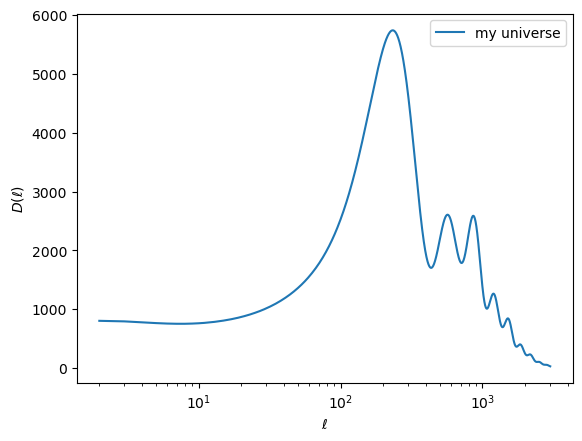

In [9]:
plt.figure(dpi = 100)
plt.plot(l_my_uni, Dl_TT_my_uni, label = 'my universe')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D(\ell)$')
plt.xscale('log')
plt.legend()
plt.show()

it is time to see what does observation tell us about the real universe we live.

In [12]:
planck18_data_path = 'planck/COM_PowerSpect_CMB-TT-full_R3.01.txt'
planck18_bf_path = 'planck/COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt'

# the datapoints
planck18_Dl_data = np.loadtxt(planck18_data_path)
l_planck18 = planck18_Dl_data[:, 0]
Dl_planck18 = planck18_Dl_data[:, 1]
dDlm_planck18 = planck18_Dl_data[:, 2]
dDlp_planck18 = planck18_Dl_data[:, 3]
Dl_err_planck18 = np.array([dDlm_planck18, dDlp_planck18])
Dl_err_planck18_sum = dDlm_planck18 + dDlp_planck18
Dl_err_planck18_mean = Dl_err_planck18_sum / 2

# the best fit curve from the planck 2018 data
planck18_bf_data = np.loadtxt(planck18_bf_path)
calPlanck = 0.1000442E+01
l_planck18_bf = planck18_bf_data[:, 0]
Dl_TT_planck_bf = planck18_bf_data[:, 1] / calPlanck**2

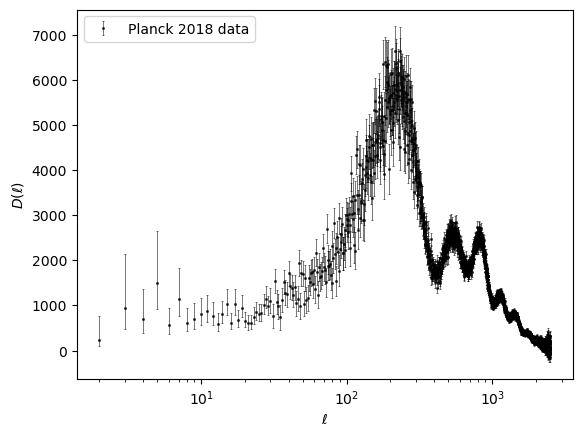

In [13]:
plt.figure(dpi = 100)
plt.errorbar(l_planck18, Dl_planck18, yerr = Dl_err_planck18, marker = 's', mfc = 'k', mec = 'k', ms = 1, ecolor = 'k', elinewidth = 0.5, linestyle = 'none', capsize = 1, capthick = 0.5, alpha = 0.75, zorder = 0, label = 'Planck 2018 data')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D(\ell)$')
plt.xscale('log')
plt.legend()
plt.show()

there are too many data points which makes it difficult to read. let's drop some of the points to make it prettier.

In [14]:
def pick_cmb_plot(cmb_data, threshold = 28):
    cmb_plot_length = int(threshold + len(cmb_data[threshold:]) / 5)
    cmb_plot = np.zeros(cmb_plot_length)
    cmb_plot[: threshold] = cmb_data[:threshold]
    for i in range(threshold, cmb_plot_length):
        index = threshold + 5 * (i - threshold)
        cmb_plot[i] = cmb_data[index]

    return cmb_plot

l_planck18_plot = pick_cmb_plot(l_planck18)
Dl_planck18_plot = pick_cmb_plot(Dl_planck18)
dDlm_planck18_plot = pick_cmb_plot(dDlm_planck18)
dDlp_planck18_plot = pick_cmb_plot(dDlp_planck18)
Dl_err_planck18_plot = np.array([dDlm_planck18_plot, dDlp_planck18_plot])

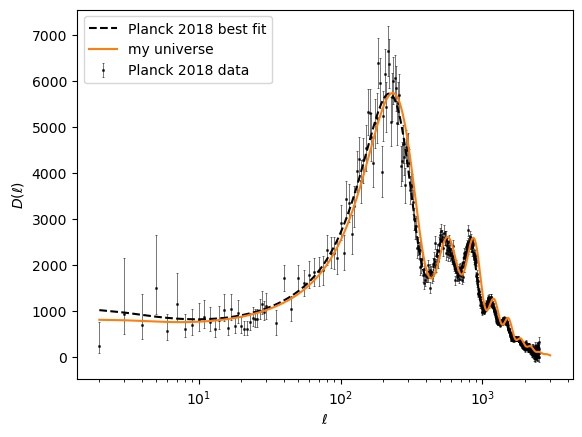

In [15]:
plt.figure(dpi = 100)
plt.errorbar(l_planck18_plot, Dl_planck18_plot, yerr = Dl_err_planck18_plot, marker = 's', mfc = 'k', mec = 'k', ms = 1, ecolor = 'k', elinewidth = 0.5, linestyle = 'none', capsize = 1, capthick = 0.5, alpha = 0.75, zorder = 0, label = 'Planck 2018 data')
plt.plot(l_planck18_bf, Dl_TT_planck_bf, color = 'k', linestyle = '--', label = 'Planck 2018 best fit')
plt.plot(l_my_uni, Dl_TT_my_uni, label = 'my universe')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D(\ell)$')
plt.xscale('log')
plt.legend()
plt.show()

now you can see that the universe we just created is different from the best fit of planck 2018.

remember the question we want to solve? we want to know what is the current expansion rate. we hope the value is `params_my_uni.h = 0.5` ($50 \ km \ s^{-1} \ Mpc^{-1}$). but does the observation support this assumption?

the easiest way to solve it is to try different `h` and produce many different curves like we did above. then compare these curves with the data (planck 2018 in our case) and find out which curve fits the data the best. the best fit `h` is then the one that generates this curve.

to do so, we can use MCMC method, which is what we are going to do.

In [16]:
import time
import emcee
from tqdm import tqdm

In [17]:
def cal_log_likelihood(theta, Dl_data, Dl_data_err, model_name, data_type = 'TT'):
    h = theta
    mod_model(h, model_name)

    if data_type == 'TT':
        Dl_l, Dl_model = fetch_Dl_class(model_name)

    if len(Dl_data) < len(Dl_model):
        Dl_l = Dl_l[:len(Dl_data)]
        Dl_model = Dl_model[:len(Dl_data)]
        if Dl_l[0] != 2 or Dl_l[-1] != 2508:
            raise ValueError('the data has a problem, check again. Dl_l range is ({}, {})'.format(Dl_l[0], Dl_l[-1]))
    else:
        raise ValueError('not enough data generated, len(l) = {}'.format(len(Dl_model)))
        
    sigma2 = Dl_data_err**2 +  (2 / (2 * Dl_l + 1)) * Dl_model**2

    return -0.5 * np.sum((Dl_data - Dl_model)**2 / sigma2 + np.log(sigma2))

model_name = 'my_uni_mcmc'
theta = 0.5
log_temp = cal_log_likelihood(theta, Dl_planck18, Dl_err_planck18_mean, model_name)

In [18]:
def log_prior(theta):
    h = theta
    if 0.5 < h < 0.8:
        return 0
    
    return -np.inf

def log_probability(theta, Dl_data, Dl_data_err, model_name):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    
    return lp + cal_log_likelihood(theta, Dl_data, Dl_data_err, model_name)

In [28]:
pos = 0.5
pos = pos + 0.1 * np.random.randn(3, 1)
nwalkers, ndim = pos.shape
model_name = 'my_uni_mcmc'

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args = (Dl_planck18, Dl_err_planck18_mean, model_name))
sampler.run_mcmc(pos, 3000, progress = True)
tau = sampler.get_autocorr_time()

100%|██████████| 3000/3000 [02:01<00:00, 24.59it/s]


NOTE: if you see the follow error message,
```
AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = val1;
tau: [val2]
```
that is fine. the message is simply a warning that the number of steps you give in `sampler.run_mcmc(pos, nsteps, progress = True)` is too small (it needs `nsteps >= tau * 50`). but the calculation is finished.

In [29]:
from IPython.display import display, Math

flat_samples = sampler.get_chain(discard = 1500, thin = 25, flat = True)
labels = [r'$h$']
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])  # the estimated value at x per cent of the array
    q = np.diff(mcmc)   # mcmc[n] - mcmc[n - 1]
    txt = 'h = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}'
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

the $h$ we just found is the best fit value that we extract from the observation. 

the best fit value from planck people is $h = 0.6732$. if what we did is correct, our result should not be too far away from this value.

In [30]:
path = './run_this'
run(path, shell = True)

Hope you have had fun with this little program ;-)
Happy Christmas!
And HAPPY 2023!!!


CompletedProcess(args='./run_this', returncode=0)